# DSCI 303 - Project 03

### Mallory Stern

In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function

A function will be created and then tested for the purpose of generating sequences of simulated daily stock prices.

In [2]:
#start: represents current price of the stock and starting price for run
#rate: expected annual yield rate for the stock
#vol: annual volatility of stock. measures the "uncertainty" in the future price
#days: number of days into the future to simulate prices

def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_multipliers = np.round((daily_multipliers * start), 2)
    days = np.insert(daily_multipliers, 0, start)
    return days

The above function will now be tested with a sample data, and then plotted.

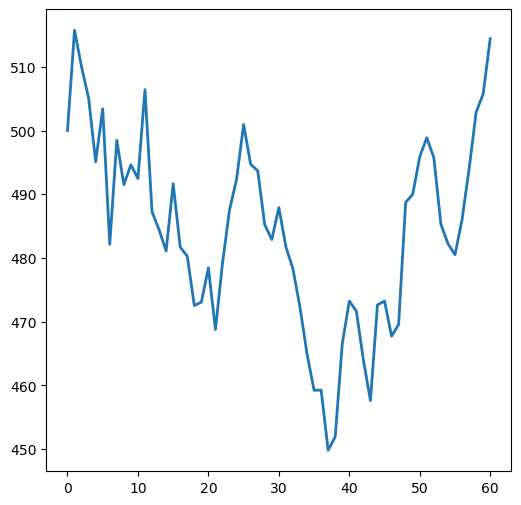

In [3]:
np.random.seed(1)

test = simulate_stock(500, 0.08, 0.3, 60)

plt.figure(figsize=[6, 6])

plt.plot(test, lw=2);

## Part B: Annual Yield Function

A function will be created that takes a simulated run and calculates the annual yield for that run.

In [4]:
def find_yield(run):
    annual_yield = math.log(((run[len(run) - 1]) / run[0])) * (252 / (len(run) - 1))
    return annual_yield

The above function will now be tested using the previously simulated run from Part A.

In [5]:
find_yield(test)

0.11957749429791611

Using the previously simulated run, the next cell will now explore potential variability by creating and plotting 25 simluated runs.

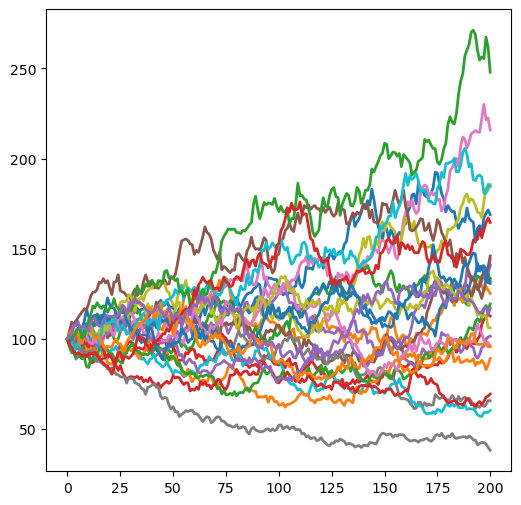

In [6]:
plt.figure(figsize=[6, 6])
temp2_list = []

for i in range(0, 25):
    test2 = simulate_stock(100, 0.06, 0.4, 200)
    temp2_list.append(find_yield(test2))
    plt.plot(test2, lw=2);   
    
plt.show()

The annual yields for the previously simulated 25 runs will now be displayed.

In [7]:
print(temp2_list)

[0.6610833880391678, 0.2835777551923431, 0.3501023192138032, 0.15064463617262547, 0.019752364025109596, 0.36348700830415503, 0.9696945292275483, -0.528331248812074, 0.7798246225867601, -0.6350595701151763, 0.4318502305318228, -0.1445694736127334, 0.22340935886271698, -0.4586240341139379, 0.46084954591863986, 0.47682990900750877, -0.04789693716975238, -1.2092475651498789, 0.07484443253462407, 0.772406631461632, 0.3385980165137137, -0.055774424535499446, 1.144100910231606, 0.6283012967711953, 0.19782472350017752]


## Part C: Finding Seeds that Generate Specific Outcomes

The following will attempt to find seeds that result in specific outcomes.

In the cell below, Stock A has the highest simulated final price.

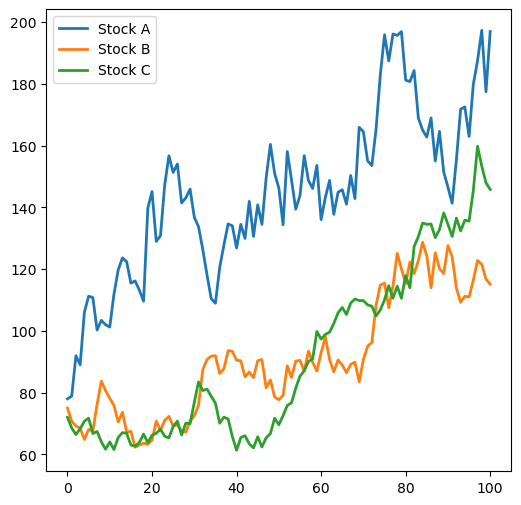

In [8]:
np.random.seed(120)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.016, 0.6, 100)

plt.figure(figsize=[6, 6])

plt.plot(stock_A, lw=2, label='Stock A')
plt.plot(stock_B, lw=2, label='Stock B')
plt.plot(stock_C, lw=2, label='Stock C')

plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated final price.

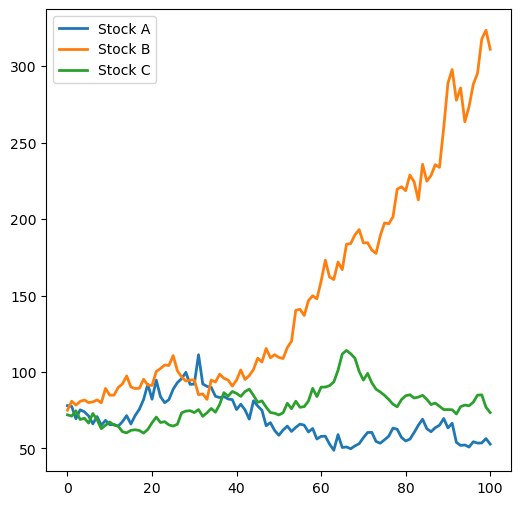

In [9]:
np.random.seed(22)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.016, 0.6, 100)

plt.figure(figsize=[6, 6])

plt.plot(stock_A, lw=2, label='Stock A')
plt.plot(stock_B, lw=2, label='Stock B')
plt.plot(stock_C, lw=2, label='Stock C')

plt.legend()
plt.show()

In the cell below, Stock C has the highest simulated final price.

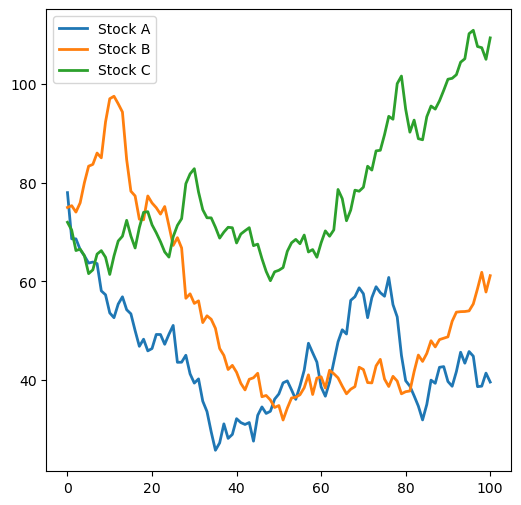

In [10]:
np.random.seed(89)

stock_A = simulate_stock(78, 0.04, 1.2, 100)
stock_B = simulate_stock(75, 0.08, 0.8, 100)
stock_C = simulate_stock(72, 0.016, 0.6, 100)

plt.figure(figsize=[6, 6])

plt.plot(stock_A, lw=2, label='Stock A')
plt.plot(stock_B, lw=2, label='Stock B')
plt.plot(stock_C, lw=2, label='Stock C')

plt.legend()
plt.show()

## Part D: Monte Carlo Simulation

The code in this part will be utilizing the Monte Carlo Simulation. The code will be estimate probabilities using several different simulations to get a range of possible outcomes that could possibly occur. 

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for i in range(num_runs):
            daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**0.5), size = days)
            cumulative_yields = np.cumsum(daily_yields)
            daily_multipliers = np.exp(cumulative_yields)
            daily_multipliers = np.round((daily_multipliers * start), 2)
            final_prices = np.append(final_prices, daily_multipliers[len(daily_multipliers) - 1])
            run = np.insert(daily_multipliers, 0, start)
            
            annual_yield = math.log(((run[len(run) - 1]) / run[0])) * (252 / (len(run) - 1))
            annual_yields = np.append(annual_yields, annual_yield)            
            
    return (annual_yields, final_prices)

The above code will now be tested with a Monte Carlo simulation using a specific seed. 

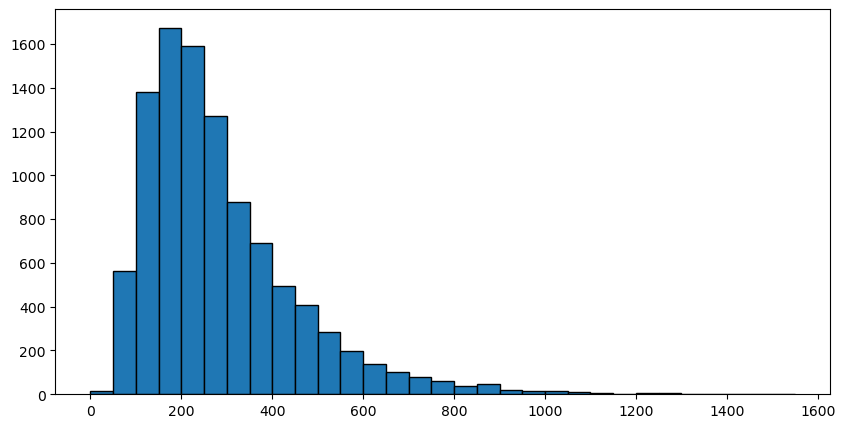

In [12]:
np.random.seed(1)

annual, final = monte_carlo(200, 0.10, 0.4, 500, 10000)

plt.figure(figsize=[10, 5])

plt.hist(final, edgecolor='black', bins = np.arange(0, 1600, 50))
plt.show()

The following will display the 10th, 25th, 50th, 75th and 90th percentiles of the simulated final prices.

In [13]:
print(f'10th percentile: {np.percentile(final, 10):.2f}')
print(f'25th percentile: {np.percentile(final, 25):.2f}')
print(f'50th percentile: {np.percentile(final, 50):.2f}')
print(f'75th percentile: {np.percentile(final, 75):.2f}')
print(f'90th percentile: {np.percentile(final, 90):.2f}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

The following will look at the effect of volatility on simulated stock prices by performing two Monte Carlo simulations. Both Monte Carlo simulations will be the same except for the volatilities. 

In [14]:
np.random.seed(1)

stockA_annual, stockA_final = monte_carlo(100, 0.012, 0.3, 150, 10000)
stockB_annual, stockB_final = monte_carlo(100, 0.012, 0.7, 150, 10000)

print(f'Average Annual Yield for A over 10000 runs: {(np.sum(stockA_final)/len(stockA_final)):.4f}')
print(f'Average Annual Yield for B over 10000 runs: {(np.sum(stockB_final)/len(stockB_final)):.4f}')

Average Annual Yield for A over 10000 runs: 103.5518
Average Annual Yield for B over 10000 runs: 116.0215


Visuals of the two Monte Carlo simulations will be created by plotting the results in histograms.

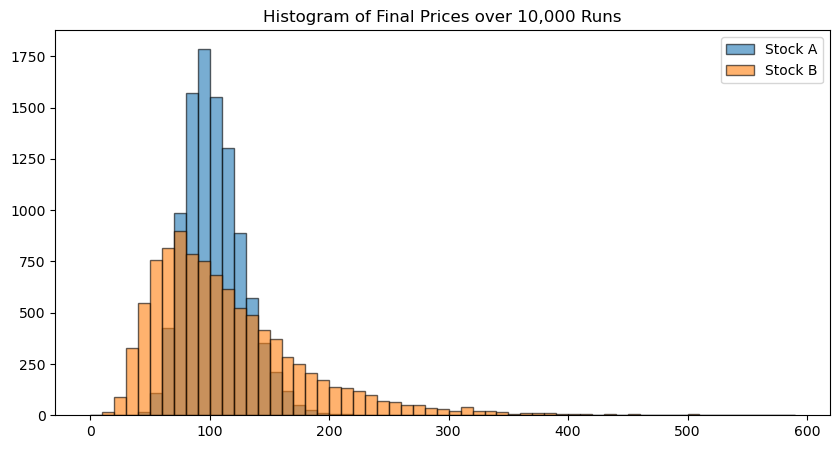

In [15]:
plt.figure(figsize=[10, 5])


plt.hist(stockA_final, edgecolor = 'black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'Stock A')
plt.hist(stockB_final, edgecolor = 'black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()
plt.show()

## Part F: Comparing Two Stocks

The following will utilize the Monte Carlo simulation on two different stocks to estimate probabalities.

In [16]:
np.random.seed(1)

stockA_annual, stockA_final = monte_carlo(120, 0.08, 0.2, 252, 10000)
stockB_annual, stockB_final = monte_carlo(120, 0.05, 0.5, 252, 10000)

temp = 0
stockA_150 = 0
stockB_150 = 0
stockA_100 = 0
stockB_100 = 0

for i in range(len(stockA_final)):
    if stockA_final[i - 1] > stockB_final[i - 1]:
        temp += 1
        
for i in range(len(stockA_final)):
    if stockA_final[i - 1] > 150:
        stockA_150 += 1
    else:
        stockB_150 += 1

for i in range(len(stockA_final)):
    if stockA_final[i - 1] < 100:
        stockA_100 += 1
    else:
        stockB_100 += 1

print(f'Proportions of runs in which...')
print(f'-------------------------------')
print(f'A ends above B:   {(temp / len(stockA_final)):.4f}')
print(f'')
print(f'A ends above 150: {(stockA_150 / len(stockA_final)):.4f}')
print(f'B ends above 150: {(stockB_150 / len(stockA_final)):.4f}')
print(f'')
print(f'A ends below 100: {(stockA_100 / len(stockA_final)):.4f}')
print(f'B ends below 100: {(stockB_100 / len(stockA_final)):.4f}')
    

Proportions of runs in which...
-------------------------------
A ends above B:   0.5206

A ends above 150: 0.2338
B ends above 150: 0.7662

A ends below 100: 0.0950
B ends below 100: 0.9050


## Part G: Expected Call Payoff

This part will utilize Monte Carlo to estimate the expected payoff of a call on a certain stock. 

In [17]:
np.random.seed(1)

annual, final = monte_carlo(200, 0.11, 0.4, 150, 10000)

payoff = final - 225
payoff[payoff < 0] = 0

result = np.sum(payoff) / len(payoff)

print(result)

27.097683
